# Exercise

Modify the code to get a better testing accuracy.
- Change the number of hidden units
- Increase the number of hidden layers
- Use a different optimizer

# Deep Neural Network using Keras

In [ ]:
import tensorflow as tf

from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam  # Importing Adam optimizer

import random
import numpy as np

2.15.0


In [ ]:
random.seed(42)         # Initialize the random number generator.
np.random.seed(42)      # With the seed reset, the same set of
                        # numbers will appear every time.
#tf.set_random_seed(42)  # sets the graph-level random seed

## Dataset

In [ ]:
# Use the MNIST dataset  of Keras.

mnist = tf.keras.datasets.mnist

(Xtrain, Ytrain) , (Xtest, Ytest) = mnist.load_data()

Text(0.5, 1.0, 'Ground Truth (Test): 7')

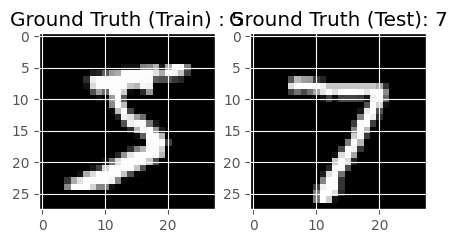

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(Xtrain[0,:,:], cmap='gray')
plt.title("Ground Truth (Train) : {}".format(Ytrain[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(Xtest[0,:,:], cmap='gray')
plt.title("Ground Truth (Test): {}".format(Ytest[0]))

In [ ]:
# size of the datsets

print(Xtrain.shape)
print(Xtest.shape)
print(Ytrain.shape)
print(Ytest.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [ ]:
# print a sample data

print('Xtrain \n', Xtrain[10,10])
print('Xtest \n', Xtest[10,10])
print('Ytrain \n', Ytrain[10,])
print('Ytest \n', Ytest[10,])

Xtrain 
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  24 209 254 254 254
 171   0   0   0   0   0   0   0   0   0]
Xtest 
 [  0   0   0   0   0   0   0   0 194 254 103   0   0   0   0   0   0   0
   0   0 150 254 213   0   0   0   0   0]
Ytrain 
 3
Ytest 
 0


In [ ]:
# Normalize the data
# 60000 input images are in the train set.
# 10000 input images are in the test set.

Xtrain = Xtrain.reshape((60000, 28*28))    # reshape the input set to size 28*28.
Xtrain = Xtrain.astype('float32')/255      # normalize to grayscale; set datatype as float32

Xtest = Xtest.reshape((10000, 28*28))      # reshape the input set to size 28*28.
Xtest = Xtest.astype('float32')/255        # normalize to grayscale; set datatype as float32

Ytrain = tf.keras.utils.to_categorical(Ytrain)
Ytest = tf.keras.utils.to_categorical(Ytest)

In [ ]:
# print a sample data

print('Xtrain \n', Xtrain[10,10])
print('Xtest \n', Xtest[10,10])
print('Ytrain \n', Ytrain[10,])
print('Ytest \n', Ytest[10,])

Xtrain 
 0.0
Xtest 
 0.0
Ytrain 
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
Ytest 
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


## DNN Model

Using Keras, create the DNN or Sequential Model

In [ ]:
# Create a model object

dnnModel = models.Sequential()

Add dense layers, specifying the number of units in each layer and the activation function used in the layer.

In [ ]:
# Layer 1 = hidden layer
# specify the input size in the first layer.MLP

dnnModel.add(layers.Dense(128, activation='relu', input_shape= (28*28,)))  # CHNAGED FROM 50 TO 128

# Layer 2 = hidden layer
dnnModel.add(layers.Dense(128, activation='relu'))  # CHANGED FROM 60 TO 128

# Layer 3 = hidden layer
dnnModel.add(layers.Dense(64, activation='relu')) # CHANGED FROM 30 TO 64


# Layer 4 = output layer
# number of neurons = number of classes = 10
dnnModel.add(layers.Dense(10, activation='softmax'))

dnnModel.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 128)               100480    
                                                                 
 dense_13 (Dense)            (None, 128)               16512     
                                                                 
 dense_14 (Dense)            (None, 64)                8256      
                                                                 
 dense_15 (Dense)            (None, 10)                650       
                                                                 
Total params: 125898 (491.79 KB)
Trainable params: 125898 (491.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


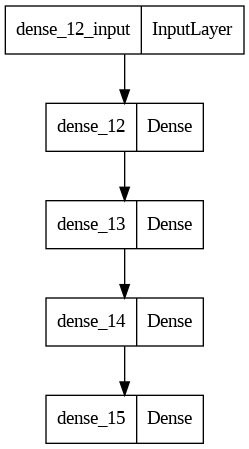

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(dnnModel, to_file='2A DNN.png')
from IPython.display import Image
Image(filename='2A DNN.png')

## Regularization and Optimizations of DNN

In [ ]:
# Configure  the model for training, by using appropriate optimizers and regularizations
# Available optimizer: adam, rmsprop, adagrad, sgd
# loss:  objective that the model will try to minimize.
# Available loss: categorical_crossentropy, binary_crossentropy, mean_squared_error
# metrics: List of metrics to be evaluated by the model during training and testing.

optimizer = Adam(learning_rate=0.001)  # CHANGING FROM SGD TO ADAM
dnnModel.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


## Train the Model

In [ ]:
# train the model



h  = dnnModel.fit( Xtrain, Ytrain, epochs=25, validation_split=0.1, batch_size=64)

Epoch 1/25
844/844 [==============================] - 8s 8ms/step - loss: 0.2862 - accuracy: 0.9165 - val_loss: 0.1131 - val_accuracy: 0.9682
Epoch 2/25
844/844 [==============================] - 4s 5ms/step - loss: 0.1120 - accuracy: 0.9658 - val_loss: 0.1012 - val_accuracy: 0.9692
Epoch 3/25
844/844 [==============================] - 5s 6ms/step - loss: 0.0793 - accuracy: 0.9748 - val_loss: 0.0848 - val_accuracy: 0.9735
Epoch 4/25
844/844 [==============================] - 4s 5ms/step - loss: 0.0590 - accuracy: 0.9807 - val_loss: 0.0848 - val_accuracy: 0.9775
Epoch 5/25
844/844 [==============================] - 4s 5ms/step - loss: 0.0466 - accuracy: 0.9851 - val_loss: 0.1218 - val_accuracy: 0.9617
Epoch 6/25
844/844 [==============================] - 5s 6ms/step - loss: 0.0361 - accuracy: 0.9879 - val_loss: 0.0962 - val_accuracy: 0.9727
Epoch 7/25
844/844 [==============================] - 4s 4ms/step - loss: 0.0289 - accuracy: 0.9907 - val_loss: 0.0926 - val_accuracy: 0.9777
Epoch 

In [ ]:
#print('Final training loss \t', h.history['loss'][-1])
print('Final training accuracy ', h.history['accuracy'][-1])
#print('Final training loss \t', h.history['val_loss'][-1])
print('Final validation accuracy ', h.history['val_accuracy'][-1])

Final training accuracy  0.9961481690406799
Final validation accuracy  0.9775000214576721


## Testing the Model

In [ ]:
# testing the model

testLoss, testAccuracy = dnnModel.evaluate( Xtest, Ytest)

313/313 [==============================] - 1s 2ms/step - loss: 0.1269 - accuracy: 0.9767


In [ ]:
print('Testing loss \t', testLoss)
print('Testing accuracy ', testAccuracy)

Testing loss 	 0.12685568630695343
Testing accuracy  0.9767000079154968


In [ ]:
num_classes = 9

#traget names
target_names = ["Class {}".format(i) for i in range(num_classes)]

Ytrue = np.argmax(Ytest,axis = 1)

# Predict Labels
Ypredicted = dnnModel.predict(Xtest)
Ypredicted = np.argmax(np.round(Ypredicted),axis=1)


313/313 [==============================] - 1s 2ms/step


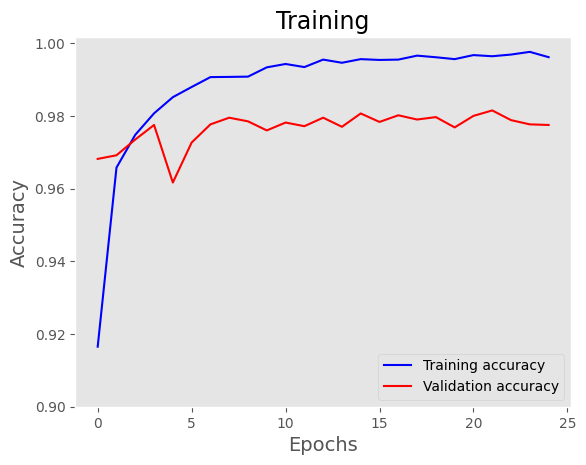

In [ ]:
import matplotlib.pyplot as plt

accuracy = h.history['accuracy']
val_accuracy = h.history['val_accuracy']

# plot loss and accuracy
epochs = range(len(accuracy))

plt.style.use('ggplot')
plt.plot(epochs, accuracy, 'blue', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'red', label='Validation accuracy')
plt.yticks((0.9,0.92,0.94,0.96,0.98,1.0))
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Training', fontsize=17)
plt.legend(loc='lower right')
plt.grid(None)

plt.show()

[[ 973    1    1    0    0    0    1    1    2    1]
 [   1 1127    2    0    0    2    2    0    1    0]
 [   6    0 1004    3    6    0    0    5    7    1]
 [   1    0    3  985    0    5    0    4    9    3]
 [   2    0    3    0  943    0    2    2    0   30]
 [   4    1    0   12    1  852    2    3   11    6]
 [   5    3    0    0    6    5  938    0    1    0]
 [   2    6    3    1    2    0    0 1001    3   10]
 [   1    0    4    7    1    3    0    4  950    4]
 [   2    5    1    2    1    2    0    2    3  991]]


<Axes: >

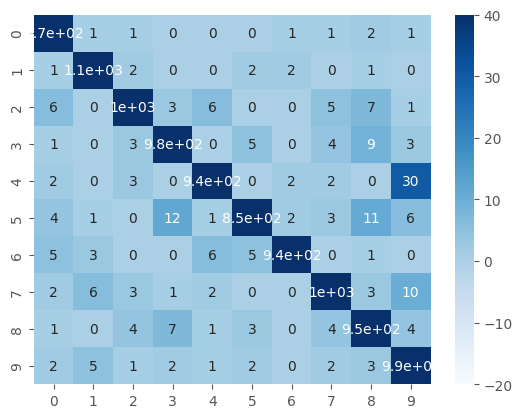

In [ ]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Ytrue, Ypredicted)
print(cm)
df_cm = pd.DataFrame(cm)

#plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, vmin=-20, vmax=40, cmap="Blues")


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(Ytrue, Ypredicted))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.98      0.96      0.97       982
           5       0.98      0.96      0.97       892
           6       0.99      0.98      0.99       958
           7       0.98      0.97      0.98      1028
           8       0.96      0.98      0.97       974
           9       0.95      0.98      0.96      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



# CONCLUSION


---



*   By increasing the number of hidden units from 50 to 128
*   By increasing the number of hidden layers from 60 to 128
*   By increasing the number of additional hidden layers from 30 to 64

AND

*   Changing the Optimizer from **SGD to ADAM** with learning rate of *0.001*



**SGD Optimmizer:**

*   Final training accuracy  0.9878148436546326
*   Final validation accuracy  0.9786666631698608


*   Testing loss 	 0.11252103000879288
*   Testing accuracy  0.965499997138977



**ADAM Optimizer**

*   Final training accuracy  0.9961481690406799
*   Final validation accuracy  0.9775000214576721


*   Testing loss 	 0.12685568630695343
*   Testing accuracy  0.9767000079154968


We can improve the training accuracy by **0.9 %** testing accuracy by **1.6 %**








